# <span style="color:gray">Helper Functions </span>  

In [1]:
from IPython.display import display,HTML

def df_display(list_dfs, cols=1):
    html_table = "<table style='width:100%; border:0px'>{content}</table>"
    html_row = "<tr style='border:0px'>{content}</tr>"
    html_cell = "<td style='width:{width}%;vertical-align:top;border:0px'>{{content}}</td>"
    html_cell = html_cell.format(width=100/cols)
    cells = [ html_cell.format(content=df.to_html()) for df in list_dfs ]
    cells += (cols - (len(list_dfs)%cols)) * [html_cell.format(content="")] # pad
    rows = [ html_row.format(content="".join(cells[i:i+cols])) for i in range(0,len(cells),cols)]
    display(HTML(html_table.format(content="".join(rows))))

def df_html(df, cols=1):
    html_table = "<table style='width:100%; border:0px'>{content}</table>"
    html_row = "<tr style='border:0px'>{content}</tr>"
    html_cell = "<td style='width:{width}%;vertical-align:top;border:0px'>{{content}}</td>"
    html_cell = html_cell.format(width=100/cols)
    cells = [ html_cell.format(content=df.to_html())  ]
    cells += (cols - (1%cols)) * [html_cell.format(content="")] # pad
    rows = [ html_row.format(content="".join(cells[i:i+cols])) for i in range(0,len(cells),cols)]
    return html_table.format(content="".join(rows))

# <span style="color:gray"> Load and Format Data </span>

In [2]:
import pandas as pd
DF = pd.DataFrame
pd.set_option('display.max_colwidth', -1)

import numpy as np
import sys
from IPython.display import display,HTML

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
id_map = pd.read_csv("student-random-number.csv", header=None).sort_values([0]).reset_index()
#id_map

In [5]:
region_map = pd.read_csv('student-pid-group.csv').sort_values(["student_pid"]).reset_index()
region_map.columns = ['temp','student_pid', 'group_id']
region_map = region_map[["student_pid","group_id"]]
region_map["id_num"]= id_map[1]
#region_map

we use the group_map to add region lables to the region_map dataframe.

In [6]:
group_map = pd.read_csv("student-pid-dataset.csv")

regions = []
for s in region_map["student_pid"].values:
    region = group_map[ group_map["student_pid"]==s ][" dataset_id"].values[0]
    regions.append(region)

region_map["region"]= regions

df is the name of the big dataset that most of the small datasets are created out of. Below we create df

In [7]:
df = pd.read_csv('data.csv')

id_nums = []
for pid in df["pid"].values :
    id_num = id_map[id_map[0]==pid][1].values[0]
    id_nums.append( id_num )
df["id_num"]= id_nums

region_ids = []
for name in df["pid"].values:
    region_ids.append( region_map[region_map["student_pid"]==name]["group_id"].values[0] )
df["region_num"]=region_ids

data = df[["pid","id1_1","id2_1","region1","rigor1","signif1","orig1","present1",
           "id1_2","id2_2","region2","rigor2","signif2","orig2","present2",
           "id1_3","id2_3","region3","rigor3","signif3","orig3","present3",
           "id1_4","id2_4","region4","rigor4","signif4","orig4","present4",
           "id1_5","id2_5","region5","rigor5","signif5","orig5","present5","id_num","region_num"]]

In [8]:
df.head(2)

,time,name,pid,id1_1,id2_1,region1,rigor1,rigor1_notes,signif1,signif1_notes,...,rigor5,rigor5_notes,signif5,signif5_notes,orig5,orig5_notes,present5,present5_notes,id_num,region_num
0,5/16/2017 22:23:00,Lifan Chen,A53223155,148,68,SSSSBSBB,Submission 1,NaN,Submission 1,NaN,...,Submission 1,NaN,Submission 1,NaN,Submission 1,NaN,Submission 1,NaN,8,29
1,5/16/2017 22:59:00,Jian Li,A53219654,84,49,SSSBSBBS,Equal Rigor,NaN,Submission 1,NaN,...,Equal Rigor,NaN,Submission 1,NaN,Submission 1,NaN,Equal Presentation,NaN,137,16


In [9]:
print "all columns that exist in original data frame"
df.columns

all columns that exist in original data frame


Index([u'time', u'name', u'pid', u'id1_1', u'id2_1', u'region1', u'rigor1',
       u'rigor1_notes', u'signif1', u'signif1_notes', u'orig1', u'orig1_notes',
       u'present1', u'present1_notes', u'id1_2', u'id2_2', u'region2',
       u'rigor2', u'rigor2_notes', u'signif2', u'signif2_notes', u'orig2',
       u'orig2_notes', u'present2', u'present2_notes', u'id1_3', u'id2_3',
       u'region3', u'rigor3', u'rigor3_notes', u'signif3', u'signif3_notes',
       u'orig3', u'orig3_notes', u'present3', u'present3_notes', u'id1_4',
       u'id2_4', u'region4', u'rigor4', u'rigor4_notes', u'signif4',
       u'signif4_notes', u'orig4', u'orig4_notes', u'present4',
       u'present4_notes', u'id1_5', u'id2_5', u'region5', u'rigor5',
       u'rigor5_notes', u'signif5', u'signif5_notes', u'orig5', u'orig5_notes',
       u'present5', u'present5_notes', u'id_num', u'region_num'],
      dtype='object')

In [10]:
data_stacked = DF()
nums = ["1","2","3","4","5"]
for i in nums:
    data_small = df[["pid","id_num","region_num","id1_"+i,"id2_"+i,"region"+i,"rigor"+i,"signif"+i,"orig"+i,"present"+i,
                    "rigor"+i+"_notes","signif"+i+"_notes","orig"+i+"_notes","present"+i+"_notes"]]
    data_small.columns=["pid","id_num","region_num","id1","id2","region","rigor","signif","orig","present",
                       "rigor_notes","signif_notes","orig_notes","present_notes"]
    data_stacked = data_stacked.append(data_small)

In [11]:
# useful command with "set"
set(data["rigor1"].values)

{'Equal Rigor',
 'One or Two Missing Submission',
 'Submission 1',
 'Submission 2'}

# Compute Students' Scores

This code computes student's scores:

In [12]:
ids = [["1","2"],["2","1"]]
nums = ["1","2","3","4","5"]
results = []
lengths = []

for i in range(1,180):
    length,count = 0,0
    for id in ids:
        for num in nums:
            df_small= data[data["id"+id[0]+"_"+num]==i]
            count += DF(df_small[["rigor"+num,"signif"+num,"orig"+num,"present"+num]]=="Submission "+id[0]).sum().sum()
            count -= DF(df_small[["rigor"+num,"signif"+num,"orig"+num,"present"+num]]=="Submission "+id[1]).sum().sum()
            
            aWord= "One or Two Missing Submission"
            noShow = DF(df_small[["rigor"+num,"signif"+num,"orig"+num,"present"+num]]== aWord ).sum().sum()
            length += ((df_small.shape[0]*4) - noShow)/4
            
    results.append(count)
    lengths.append(length)
student_scores = np.array(results)/ np.array(lengths)
#print "Results:" #print results #print "\nLengths" #print lengths #print"\nstudent_scores" #print student_scores

Below are some basic statistics:

In [13]:
print "Min grade: "+str( min(student_scores) )
print "Max grade: "+str( max(student_scores) ) 
print "mean grade: "+str( np.mean(student_scores) )  

Min grade: -4.0
Max grade: 3.3
mean grade: -0.105885873903


Below is a histogram of student scores. Mean shifts to a negative number after taking into account that some notebooks are empty.

(array([ 10.,   5.,  14.,  23.,  25.,  30.,  22.,  28.,  12.,  10.]),
 array([-4.  , -3.27, -2.54, -1.81, -1.08, -0.35,  0.38,  1.11,  1.84,
         2.57,  3.3 ]),
 <a list of 10 Patch objects>)

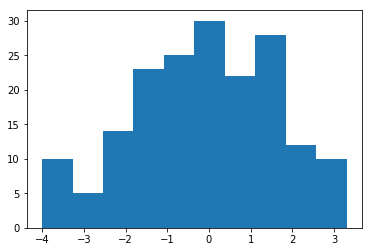

In [14]:
plt.hist(student_scores)

We create a dataframe called student_info by adding student_scores to region_map

In [15]:
region_map.sort_values(["id_num"], inplace=True)
region_map["score"] = student_scores

region_map.reset_index(inplace=True)
del region_map["index"]
student_info = region_map

We add two columns to **student_info**, these will be used later when we create html documents
* id_num2
* id_html



In [16]:
nums = [] #<-- # this block creates an array where the id numbers are in the correct format for a hyperlink
for num in student_info["id_num"].astype(str):
    while len(num)< 3: num = "0"+num
    nums.append(num)
student_info["id_num2"] = np.array(nums)

# this block creates the id_html column, which has a hyperlink to the students submission 
student_info["id_html"] = "<a href='https://github.com/ucsd-edx/CSE255-DSE230-Grading/tree/master/"+\
                            student_info["id_num2"]+"'>"+student_info["student_pid"]+"</a>" 

# Finding Missing Notebooks

We use the following code to find all missing submissions.

In [17]:
aWord= "One or Two Missing Submission"
check1 = data_stacked["rigor"]   == aWord
check2 = data_stacked["signif"]  == aWord 
check3 = data_stacked["orig"]    == aWord 
check4 = data_stacked["present"] == aWord 

data_missing = data_stacked[check1 | check2 | check3 | check4]
data_missing.reset_index(inplace=True, drop=True)

In [19]:
suspects = np.append( data_missing["id1"].values, data_missing["id2"].values  )
uniq_suspects = np.unique(suspects)
count_suspects = []

for i in uniq_suspects:
    count_suspects.append( suspects.tolist().count(i) )
count_suspects = np.array(count_suspects)

#print "counts" #print count_suspects#print; print;

print "Real suspects:", uniq_suspects[ np.where(count_suspects>2)[0] ]

Real suspects: [  5  10  13  37  93 109 110 118 134 142 169 174 177 179]


**missing_reports** is the list of student who did not submit a report.  This list was created manually by checking all the suspects.

In [20]:
missing_reports = [10,109,110,118,142,177]

The only reports that got a score of -4 were missing reports.

Below is a histogram that that excludes the scores of missing reports:

Reports that had a Score of -4 : [ 10 109 110 118 142 177]
Mean Score without Missing Notebooks:  0.0291701073493


(array([  8.,   6.,  22.,  18.,  26.,  25.,  24.,  24.,  11.,   9.]),
 array([-3.5 , -2.82, -2.14, -1.46, -0.78, -0.1 ,  0.58,  1.26,  1.94,
         2.62,  3.3 ]),
 <a list of 10 Patch objects>)

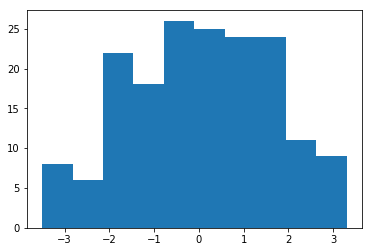

In [21]:
print "Reports that had a Score of -4 : " + str( np.where(np.array(student_scores)==-4)[0]+1 )
print "Mean Score without Missing Notebooks: ",student_scores[np.where(student_scores>-4)[0]].mean()
plt.hist(student_scores[np.where(student_scores>-4)[0]])

so as to not mess up people's grading score, we make the missing notebook have a score of 0

In [22]:
#for i in np.array(missing_reports)-1:
#    student_info.set_value( i, "score",0)
#student_info.iloc[np.array(missing_reports)-1] 

The code box below is what I used to check for missing reports

In [23]:
print "suspects"
print uniq_suspects[ np.where(count_suspects>2)[0] ][:]
print "counts"
print count_suspects[ np.where(count_suspects>2)[0] ][:]

toCheck = 10
check1 = data_stacked["id1"]== toCheck
check2 = data_stacked["id2"]== toCheck
#data_stacked[check1 | check2]

suspects
[  5  10  13  37  93 109 110 118 134 142 169 174 177 179]
counts
[ 3  8  3  4  3  9 10  9  3  6  4  3  7  5]


# <span style="color:gray"> Verifying Low Scores</span>

In [ ]:
low_scores = np.sort(np.where(student_scores<-2.5)[0]+1)#.sort()
print low_scores

In [ ]:
low_scores = set(low_scores) - set(missing_reports)

The low scores seemed all resembled what one woudl expect from a poorly created submission. No reprot received a score of -4 other than the one's that had missing submissions.

In [ ]:
print low_scores 
print student_scores[np.array(list(low_scores))-1]

Below is the code box that I used to verify that the reports with low scores where "ok."

In [ ]:
toCheck = 169
check1 = data_stacked["id1"]== toCheck
check2 = data_stacked["id2"]== toCheck
data_stacked[check1 | check2]

# <span style="color:gray">NOT FINISHED:  Compute Grader Scores (Prof's Way)</span>

I thought abaout math assumptions behind both models and I think your's is a bit better statistically. I haven't finished it yet though.

First we calculate each students grade for each of the 4 categories...

In [ ]:
#for i in range(1,180)
category_scores= { "rigor":[], "signif":[], "orig":[], "present":[] }

ids = [["1","2"],["2","1"]]
nums = ["1","2","3","4","5"]
categories = ["rigor","signif","orig","present"]
category_results= { "rigor":[], "signif":[], "orig":[], "present":[] }
lengths = []

for i in range(1,180):
    length=0
    count= { "rigor":0, "signif":0, "orig":0, "present":0 }
    for id in ids:
        for num in nums:
            df_small= data[data["id"+id[0]+"_"+num]==i]
            
            for category in categories:
                count[category] += DF(df_small[[category+num]]=="Submission "+id[0]).sum().sum()
                count[category] -= DF(df_small[[category+num]]=="Submission "+id[1]).sum().sum()

            aWord= "One or Two Missing Submission"
            noShow = DF(df_small[["rigor"+num,"signif"+num,"orig"+num,"present"+num]]== aWord ).sum().sum()
            length += ((df_small.shape[0]*4) - noShow)/4
    
    for category in categories:
        category_results[category].append( count[category] )
    lengths.append(length)

In [ ]:
category_scores = {}
for category in categories:
    category_scores[category] = np.array(category_results[category])/ np.array(lengths)

# Compute Grader Scores (My Way)


We use student_scores as as map in the following code

In [24]:
nums = ["1","2","3","4","5"]
grader_scores = [0]*179

for grader in range(data.shape[0]):
    score=0
    df_grader = data.iloc[[grader]]

    for num in nums:   #<-- for each of the 5 comparisons that the grader graded
        s1 = df_grader["id1_"+str(num)].values[0]   #<-- first we find student numbers
        s2 = df_grader["id2_"+str(num)].values[0] 

        s1_grade = student_scores[s1-1]   #<-- get the average scores for the 2 students
        s2_grade = student_scores[s2-1]
        avg_margin = s1_grade - s2_grade   #<-- compute the average margin

        margin=0     #<-- we compute the margin of the grader forthe 2 students
        margin += DF(df_grader[["rigor"+num,"signif"+num,"orig"+num,"present"+num]]=="Submission 1").sum().sum()
        margin -= DF(df_grader[["rigor"+num,"signif"+num,"orig"+num,"present"+num]]=="Submission 2").sum().sum()

        score += margin * avg_margin  #<-- compute grader score for single comparison, add it to grader total score   #print margin, avg_margin, margin* avg_margin

    pid = df_grader["pid"].values[0]               #<-- find the graders numeric id using their pid
    num_id = id_map[ id_map[0]==pid][1].values[0]
    grader_scores[num_id-1] = score
#print grader_scores[0:30]

Some basic summary statistics

In [25]:
print "Min grade: "+str( min(grader_scores) )
print "Max grade: "+str( max(grader_scores) ) 
print "mean grade: "+str( np.mean(grader_scores) ) 

Min grade: -11.8888888889
Max grade: 64.4727272727
mean grade: 23.7732232541


We add grading_score to *student_info* and plot a histogram

In [26]:
student_info["grading_score"] = grader_scores

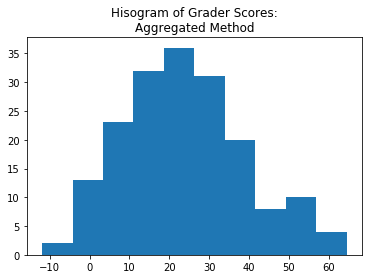

In [27]:
plt.hist(grader_scores)
plt.title("Hisogram of Grader Scores:\nAggregated Method")

### Scores on Simulated Data

In [28]:
nums = ["1","2","3","4","5"]
grader_simulated = []

for grader in range(data.shape[0]):    
    df_grader = data.iloc[[grader]]
    
    scores= []
    for trial in range(10): #<-- since this is a simulation, we run multiple trials for each grader
        score=0
        for num in nums:   #<-- for each of the 5 comparisons that the grader graded
            s1 = df_grader["id1_"+str(num)].values[0]   #<-- first we find student numbers
            s2 = df_grader["id2_"+str(num)].values[0] 

            s1_grade = student_scores[s1-1]   #<-- get the average scores for the 2 students
            s2_grade = student_scores[s2-1]
            avg_margin = s1_grade - s2_grade   #<-- compute the average margin

            #margin=0     #<-- we compute the margin of the grader forthe 2 students
            #margin += DF(df_grader[["rigor"+num,"signif"+num,"orig"+num,"present"+num]]=="Submission 1").sum().sum()
            #margin -= DF(df_grader[["rigor"+num,"signif"+num,"orig"+num,"present"+num]]=="Submission 2").sum().sum()

            margin= (np.random.binomial(4,.5) -2)*2 #<-- We now siimulated the margin, with unbiased coin
            score += margin * avg_margin  #<-- compute grader score for single comparison, add it to grader total score   #print margin, avg_margin, margin* avg_margin
        scores.append(score)

    grader_simulated.extend(scores) 


In [29]:
print len(grader_simulated)

1810


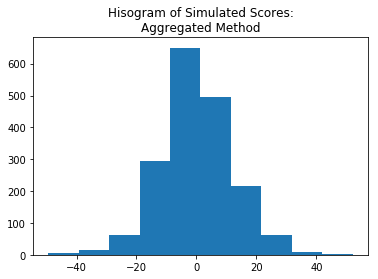

In [30]:
plt.hist(grader_simulated)
plt.title("Hisogram of Simulated Scores:\nAggregated Method")

Notice that the student histogram is very different from the random chance. The student grading scores are centered at 20 instead of 0.

# <span style="color:gray"> Get Regional Info </span>

For each region, and each criteria: sort people according to the criteria rankings.
Combine into a table for each region

In [31]:
region_tables = []

for i in  range(1,31):
    s_region = DF(student_info[ student_info["group_id"]==i ])#[["id_num"]] #<-- students in one unique region
    s_region.sort_values("score",ascending=False, inplace=True)
    s_region.reset_index(drop=True, inplace=True)
    
    region_tables.append(s_region)

### Create html code for regions:

In [32]:
print "runs:",len(region_tables)
for i in range(len(region_tables)):
    
    
    region_table = DF(region_tables[i])    
    html_text = "<h1>Region: "+region_table["region"][0]+"</h1>"
    
    print i, region_table["region"][0], region_table["score"].mean()
    
    # this block, adds a condensed verions of the region_table to the html
    s_region_table = region_table[["id_html","id_num","score"]]
    s_region_table.index += 1
    html_text = html_text+ s_region_table.to_html(escape=False) #<-- add final table to html
    html_text = html_text+ "<h3>Mean: "+str(s_region_table["score"].mean())+"</h3>"  #<-- add mean score to html
    

    for j in range( region_table.shape[0] ):
        
        ####################################################
        # This code adds the summary notes for each student
        ###################################################
        
        #print "id: "+str(region_table.iloc[j]["id_num"])
        
        # the block, gets info about the student
        html_text = html_text+ "<hr> <hr> <hr> <hr>" 
        pid = region_table.iloc[j]["student_pid"]
        id_num = region_table.iloc[j]["id_num"]
        score = region_table.iloc[j]["score"]
        
        # this block create the header html for a student
        html_text +=  "<h1>"+pid+"</h1>"
        html_text +=  "<h3>Rank: "+str(j+1)#+"&nbsp&nbsp&nbsp&nbsp Score:  "+str(score)+"</h3>"
        html_text +=  "<h2 style='color:purple'>Notebook Report:&nbsp&nbsp&nbsp&nbsp Score: "+str(score)+"</h2>"
        
        # this block creates the student's table
        check1 = data_stacked["id1"]== id_num
        check2 = data_stacked["id2"]== id_num
        student_table = DF( data_stacked[check1 | check2] )
        student_table["submission"] =((student_table["id2"]==id_num)+1)
        student_table["Submission_"] = "Submission "+student_table["submission"].astype('S11')
        student_table.reset_index(inplace=True)
        student_table.fillna("",inplace=True)
        
        # this block gets the rank of the opponents notebook
        student_table["against id"]  = student_table.apply(lambda x: x["id2"] if x["submission"]==1 else x["id1"], axis=1)
        def getAgainstRank(row, region_table):
            if row["against id"] in region_table["id_num"].values:
                return str(region_table.index[ region_table["id_num"]==row["against id"] ][0]+1 )
            return "<span style='color:red'>Wrong Region! id_num:"+str(row["against id"])+"</span>"
        student_table["against rank"] = student_table.apply(lambda x: getAgainstRank(x,region_table) ,axis=1)

        # we create the notes in the format Freund wants
        for category in ["rigor","present","orig","signif"]:
            student_table[category+"_notes"] = student_table[category+"_notes"].str.decode('UTF-8',"ignore")
            student_table[category+"_notes"] = student_table[category+"_notes"].str.encode('ascii','ignore')

            for loc in range(student_table.shape[0]):
                row = student_table.iloc[loc]
                
                if row[category] == row["Submission_"]:
                    student_table.set_value( loc, category+"_notes",
                    "<p style='color:green'>Better</p>"+ row[category+"_notes"]  )
                elif row[category][:-2] == "Submission":
                    student_table.set_value( loc, category+"_notes",
                        "<p style='color:red'>Worse</p>"+ row[category+"_notes"]  )
                else:
                    student_table.set_value( loc, category+"_notes",
                        "<p style='color:grey'>"+row[category]+"</p>"+row[category+"_notes"]  )
                    
        # we now get scores
        student_table["scores"] = 2*(student_table["rigor"]==student_table["Submission_"]).values.astype("int") +\
                                2*(student_table["signif"]==student_table["Submission_"]).values.astype("int") +\
                                2*(student_table["present"]==student_table["Submission_"]).values.astype("int") +\
                                2*(student_table["orig"]==student_table["Submission_"]).values.astype("int") -\
                                (student_table["rigor"].apply(lambda x: x[:-2])=="Submission").astype("int") -\
                                (student_table["signif"].apply(lambda x: x[:-2])=="Submission").astype("int") -\
                                (student_table["present"].apply(lambda x: x[:-2])=="Submission").astype("int") -\
                                (student_table["orig"].apply(lambda x: x[:-2])=="Submission").astype("int") 

        # This blocks add the student table to the html
        student_table.sort_values("against rank",ascending=True, inplace=True)
        to_print = student_table[["against rank","Submission_","scores","rigor_notes","orig_notes","signif_notes","present_notes"]]
        to_print.reset_index(inplace=True, drop=True)
        html_text = html_text + to_print.to_html(escape=False)
        
        
        
        
        
        
        ####################################################
        ### This code adds the Grading summary for each student  ###
        ###################################################
        
        html_text += "<h2 style='color:olive'>Grading Report:&nbsp&nbsp&nbsp&nbsp Score: "+\
                                str(region_table.iloc[j]["grading_score"])+"</h2>"
        #html_text += "<h3 style='color:orange'>Grading Score: "+str(region_table.iloc[j]["grading_score"])+"</h3>"

        # this block creates the student's table
        student_table = DF(data_stacked[ data_stacked["id_num"] == id_num ])
        student_table["submission"] ="Submission "+((student_table["id2"]==id_num)+1).astype('S11')
        student_table["Submission_"] = student_table["submission"]
        student_table.reset_index(inplace=True, drop=True)
        student_table.fillna("",inplace=True)


        # we create the notes in the format Freund wants
        for category in ["rigor","present","orig","signif"]:
            student_table[category+"_notes"] = student_table[category+"_notes"].str.decode('UTF-8',"ignore")
            student_table[category+"_notes"] = student_table[category+"_notes"].str.encode('ascii','ignore')

            for loc in range(student_table.shape[0]):
                row = student_table.iloc[loc]

                if row[category] == row["submission"]:
                    student_table.set_value( loc, category+"_notes",
                    "<p style='color:green'>Better</p>"+ row[category+"_notes"]  )
                elif row[category][:-2] == "Submission":
                    student_table.set_value( loc, category+"_notes",
                        "<p style='color:red'>Worse</p>"+ row[category+"_notes"]  )
                else:
                    student_table.set_value( loc, category+"_notes",
                        "<p style='color:grey'>"+row[category]+"</p>"+row[category+"_notes"]  )

        # we now get scores
        student_table["S1 score"] = (student_table["rigor"]=="Submission 1").values.astype("int") +\
                                (student_table["signif"]=="Submission 1").values.astype("int") +\
                                (student_table["present"]=="Submission 1").values.astype("int") +\
                                (student_table["orig"]=="Submission 1").values.astype("int") -\
                                (student_table["rigor"]=="Submission 2").values.astype("int") -\
                                (student_table["signif"]=="Submission 2").values.astype("int") -\
                                (student_table["present"]=="Submission 2").values.astype("int") -\
                                (student_table["orig"]=="Submission 2").values.astype("int")
        student_table["Avg S1 score"]= student_info["score"][student_table["id1"].values-1].values

        # This blocks add the student table to the html
        to_print = student_table[["S1 score","Avg S1 score","rigor_notes","orig_notes","signif_notes","present_notes"]]
        to_print.reset_index(inplace=True, drop=True)
        html_text +=  to_print.to_html(escape=False)



    f = open('Regions/'+region_table["region"][0]+".html",'w')
    f.write(html_text)
    f.close()
    
#to_print.decode('utf-8').encode('ascii','')

runs: 30
0 BSBSBSBS -0.0363636363636
1 BSBSSSSB 0.0242424242424
2 SSSSSSBB -0.559722222222
3 BSBSSSBS -0.0136363636364
4 SBBBBBSB 0.0340067340067
5 SSSBSBBB -7.40148683083e-17
6 BBSBSBSB 0.0
7 SSSBBBBB -0.0166666666667
8 SSSBSSBB 0.0840488215488
9 BSBSSSSS 0.0363636363636
10 BSBSSSBB -7.40148683083e-17
11 BBBBSSBB -1.18353174603
12 SSSBSSSB -0.105218855219
13 SSSBSBBS 0.0388047138047
14 SBSSBSBB -0.448923761424
15 SSSSBSBB 7.40148683083e-17
16 SBBBBBBS -0.5625
17 SSSBBSSB -0.395833333333
18 SSSSBBSS 0.0326599326599
19 BSSSBSBS 0.030303030303
20 SBSSBBBS 0.0671296296296
21 SBBSSBSS -0.0799663299663
22 SSSSBSSB -3.70074341542e-17
23 SSSSBBBB -0.0212962962963
24 SSSBSSSS -0.0584175084175
25 BSSSBSBB 0.00909090909091
26 SBBSSBSB 7.40148683083e-17
27 SBSBBSSB -0.012962962963
28 BBBBBSBS -0.0205387205387
29 SBBBSBSS 0.0


# <span style="color:gray"> Get Students' Info <span>

In [ ]:
print "runs:",len(student_info)
for i in range(len(region_tables)):


    s_row = student_info.iloc[i]    #s_row
    html_text = "<h1> Student: "+s_row["id_html"]+"</h1>"
    html_text += "<h3>Region: "+s_row["region"]+"</h3><hr><hr>"
    html_text += "<h2>Score Report</h2>"
    html_text += "<h3>Notebook Score:  "+str(s_row["score"])+"</h3>"





    ### This code adds the summary notes for each student  ###


    # this block creates the student's table
    check1 = data_stacked["id1"]== s_row["id_num"]
    check2 = data_stacked["id2"]== s_row["id_num"]
    student_table = DF( data_stacked[check1 | check2] )
    student_table["submission"] ="Submission "+((student_table["id2"]==s_row["id_num"])+1).astype('S11')
    student_table["Submission_"] = student_table["submission"]
    student_table["grader"] = student_table["pid"]
    student_table.reset_index(inplace=True, drop=True)
    student_table.fillna("",inplace=True)


    # we create the notes in the format Freund wants
    for category in ["rigor","present","orig","signif"]:
        student_table[category+"_notes"] = student_table[category+"_notes"].str.decode('UTF-8',"ignore")
        student_table[category+"_notes"] = student_table[category+"_notes"].str.encode('ascii','ignore')

        for loc in range(student_table.shape[0]):
            row = student_table.iloc[loc]

            if row[category] == row["submission"]:
                student_table.set_value( loc, category+"_notes",
                "<p style='color:green'>Better</p>"+ row[category+"_notes"]  )
            elif row[category][:-2] == "Submission":
                student_table.set_value( loc, category+"_notes",
                    "<p style='color:red'>Worse</p>"+ row[category+"_notes"]  )
            else:
                student_table.set_value( loc, category+"_notes",
                    "<p style='color:grey'>"+row[category]+"</p>"+row[category+"_notes"]  )

    # we now get scores
    student_table["scores"] = 2*(student_table["rigor"]==student_table["submission"]).values.astype("int") +\
                            2*(student_table["signif"]==student_table["submission"]).values.astype("int") +\
                            2*(student_table["present"]==student_table["submission"]).values.astype("int") +\
                            2*(student_table["orig"]==student_table["submission"]).values.astype("int") -\
                            (student_table["rigor"].apply(lambda x: x[:-2])=="Submission").astype("int") -\
                            (student_table["signif"].apply(lambda x: x[:-2])=="Submission").astype("int") -\
                            (student_table["present"].apply(lambda x: x[:-2])=="Submission").astype("int") -\
                            (student_table["orig"].apply(lambda x: x[:-2])=="Submission").astype("int") 

    # This blocks add the student table to the html
    to_print = student_table[["grader","Submission_","scores","rigor_notes","orig_notes","signif_notes","present_notes"]]
    to_print.reset_index(inplace=True, drop=True)
    html_text +=  to_print.to_html(escape=False)







    ### This code adds the Grading summary for each student  ###

    html_text += "<hr><hr><h2>Grading Report</h2>"
    html_text += "<h3>Grading Score: "+str(s_row["grading_score"])+"</h3>"


    # this block creates the student's table
    g_table = DF(data_stacked[ data_stacked["id_num"] == s_row["id_num"] ])
    g_table["submission"] ="Submission "+((g_table["id2"]==s_row["id_num"])+1).astype('S11')
    g_table["Submission_"] = g_table["submission"]
    g_table.reset_index(inplace=True, drop=True)
    g_table.fillna("",inplace=True)


    # we create the notes in the format Freund wants
    for category in ["rigor","present","orig","signif"]:
        g_table[category+"_notes"] = g_table[category+"_notes"].str.decode('UTF-8',"ignore")
        g_table[category+"_notes"] = g_table[category+"_notes"].str.encode('ascii','ignore')

        for loc in range(g_table.shape[0]):
            row = g_table.iloc[loc]

            if row[category] == row["submission"]:
                g_table.set_value( loc, category+"_notes",
                "<p style='color:green'>Better</p>"+ row[category+"_notes"]  )
            elif row[category][:-2] == "Submission":
                g_table.set_value( loc, category+"_notes",
                    "<p style='color:red'>Worse</p>"+ row[category+"_notes"]  )
            else:
                g_table.set_value( loc, category+"_notes",
                    "<p style='color:grey'>"+row[category]+"</p>"+row[category+"_notes"]  )

    # we now get scores
    g_table["S1 score"] = (g_table["rigor"]=="Submission 1").values.astype("int") +\
                            (g_table["signif"]=="Submission 1").values.astype("int") +\
                            (g_table["present"]=="Submission 1").values.astype("int") +\
                            (g_table["orig"]=="Submission 1").values.astype("int") -\
                            (g_table["rigor"]=="Submission 2").values.astype("int") -\
                            (g_table["signif"]=="Submission 2").values.astype("int") -\
                            (g_table["present"]=="Submission 2").values.astype("int") -\
                            (g_table["orig"]=="Submission 2").values.astype("int")
    g_table["Avg score"]= student_info["score"][g_table["id1"].values-1].values

    # This blocks add the student table to the html
    to_print = g_table[["S1 score","Avg score","rigor_notes","orig_notes","signif_notes","present_notes"]]
    to_print.reset_index(inplace=True, drop=True)
    html_text +=  to_print.to_html(escape=False)




    f = open('Students/'+s_row["student_pid"]+".html",'w')
    f.write(html_text)
    f.close()


